# AC221 Final Project - Predictive Policing  and Its Ethical Concerns
***
**APCOMP 221: Critical Thinking in Data Science **   
Zihao Xu & Liyang Zhao  
2020 Spring

# Abstract
In this project, we explored the topic of Predictive policing and its ethical concerns. We have built several predictive policing models to forecast the number of crimes across time and location in the city of San Francisco. Further, we also performed a simulation study to show the potential danger of misusing such models.

The following document will include code embedded with explanation to show our critical thinking. 
- Section 1: Background and Ethical Concerns of Predictive Policing
- Section 2: Dataset and Exploratory Analysis
- Section 3: Building a Predictive Policing Model
- Section 4: Simulation Study
- Section 5: Conclusion and Recommendation

Here is a [link](https://docs.google.com/presentation/d/1Qok6YgQ_m76p0Q2FDzlG_pj83_OX89PMwm0FPzPQOtw/edit?usp=sharing) to our presentation.

# Section 1: Background and Ethical Concerns of Predictive Policing

### A Formal Definition

According to the RAND Corporation, predictive policing is defined as   
“the application of analytical techniques – particularly quantitative techniques – to identify likely targets for police intervention and prevent crime or solve past crimes by making statistical predictions.”

We can summarize the process of predictive policing into 4 stages, starting from collecting data on past criminal avtivities, to training models to make predictions on crimes, to informing policing activities, and finally, to receiving the adversarial response from the criminals and gathering more criminal records for the database. The plot below summarizes the four stages.

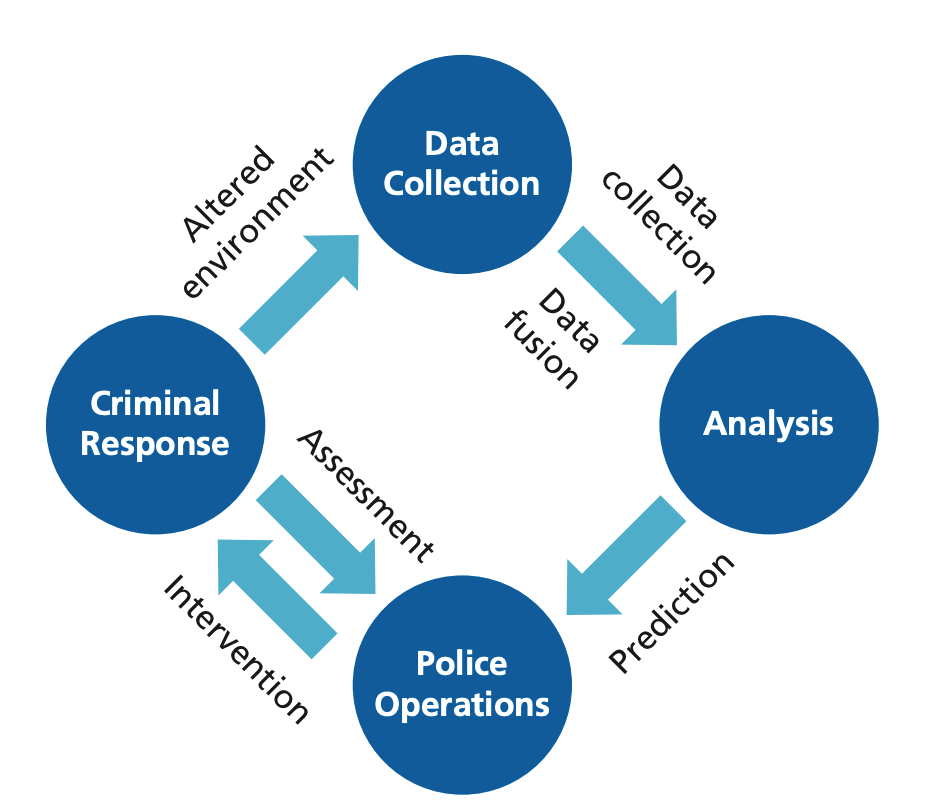

In [4]:
from IPython.display import display
from PIL import Image
display(Image.open("images/4-stage.png"))

It is very important to note that, aside from the data collection and modeling part, the third and fourth stages of the entire predictive policing process involves human decision on how the predictions are interpreted and used. If the police department do not set well-thoughout ways of using such predictions, there is still room for potential human bias and mis-allocation of limited police resouces, which defeats the whole purpose of using such systems in the first place.

### Potential Usage of Predictive Policing

In general, there are 4 types of usage of predictive policing systems, including
1. Methods for predicting crimes: These are approaches used to forecast places and times with an increased risk of crime.
2. Methods for predicting offenders: These approaches identify individuals at risk of offending in the future.
3. Methods for predicting perpetrators’ identities: These techniques are used to create profiles that accurately match likely offenders with specific past crimes.
4. Methods for predicting victims of crimes: Similar to those methods that focus on offenders, crime locations, and times of heightened risk, these approaches are used to identify groups or, in some cases, individuals who are likely to become victims of crime.

Other analytical tools also involve patrol route optimization, criminal acativity analytics (dashborads with visualizations), and etc. 

One good example of predictive policing tool is called Predpol. Designed by Dr. Jeff Brantingham at UCLA, PredPol is a data-driven platform that predicts where and when specific crimes are most likely to occur. Its predcions are used to direct patrol operations in the field, while the platform can also be used to analyze daily patrol patterns and their effectiveness. In February 2019, Vice reported that many police departments across the U.S. are secretly experimenting with PredPol. 

### Pros and Cons of Predictive Policing Tools

We can see that such predictive models have several advantages:
- Analytical abilities of such systems allow the officiers to search through information in large databases in a more efficient manner. 
- With advanced visualization techniques, crime analysts are able to more directly detect patterns or crime networks within crinimal records。
- Also, If properly used, these systems can optimize existing policing activities and better inform allocation of limited policing resources.  

However, such tools also raise some serious ethical concerns. 
- Firstly, it makes us rethink what consititues unlawful search and seizure and raises the need to redefine “reasonable suspicion”. It is unclear whether "being forecast to be involved in violent crimes" is sufficient to warrant a search by the police. In addition, although the U.S. Supreme Court has ruled that standards for what constitutes reasonable suspicion are relaxed in “high-crime areas”, the definition of a “high-crime” area remains unclear and is up to intrepretation.
- Secondly, much like the case with COMPAS, these predictive models are oftentimes blackboxes due to propertiary reasons. It is hard for the public, especially those that are effected by the algorithms, to know how the models were built and whether these models target specific groups or neighborhood more than others.

- Thirdly, the dataset used to train such models might represent human bias towards race, ethnicity and socioeconomic status in past policing activities.
- And finally, differences in levels of community trust in police and the desired amount of local policing  may lead to higher of lower crime reporting rates.

It is important to realize that the third and fourth points show the potential for dataset bias. Therefore, even with the most accurate machine learning models, predictions made based on such biased data sets will only reproduce the patterns and exacerbate existing biases.

# Section 2: Dataset and Exploratory Analysis

In this project, we worked with the `Police Department Incident Reports: 2018 to Present` dataset obtained from the open data initiative by the City of San Francisco. The dataset includes police incident reports filed by officers and by individuals. It includes 333016 reports covering 25 zip codes. Some example crimes include vandalism, traffic violation arrest, drug violation. 

For model validation purpose, we divided the data into reports filed in 2018 and those filed in 2019 as training and testing datasets. Below, we perform some exploratory analysis on the training data to better understand the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 100)

In [6]:
def create_counts(col):
    temp = df.groupby(col)['crime'].sum().reset_index()
    temp[col] = temp[col].astype(str)
    return temp[col], temp['crime']

# Loading in the dataset for 2018
df = pd.read_csv('data/df_train.csv')
df['zipcode'] = df['zipcode'].astype(np.int32)
df.head()

,incident_day_of_week,incident_hour,zipcode,police_district,crime,population,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income
0,Friday,0,94102,Central,1,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
1,Friday,0,94102,Mission,23,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
2,Friday,0,94102,Northern,53,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
3,Friday,0,94102,Southern,12,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
4,Friday,0,94102,Taraval,2,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0


### Relationship between predictors and crime

Text(0.5, 0.98, 'Total Counts of Crimes')

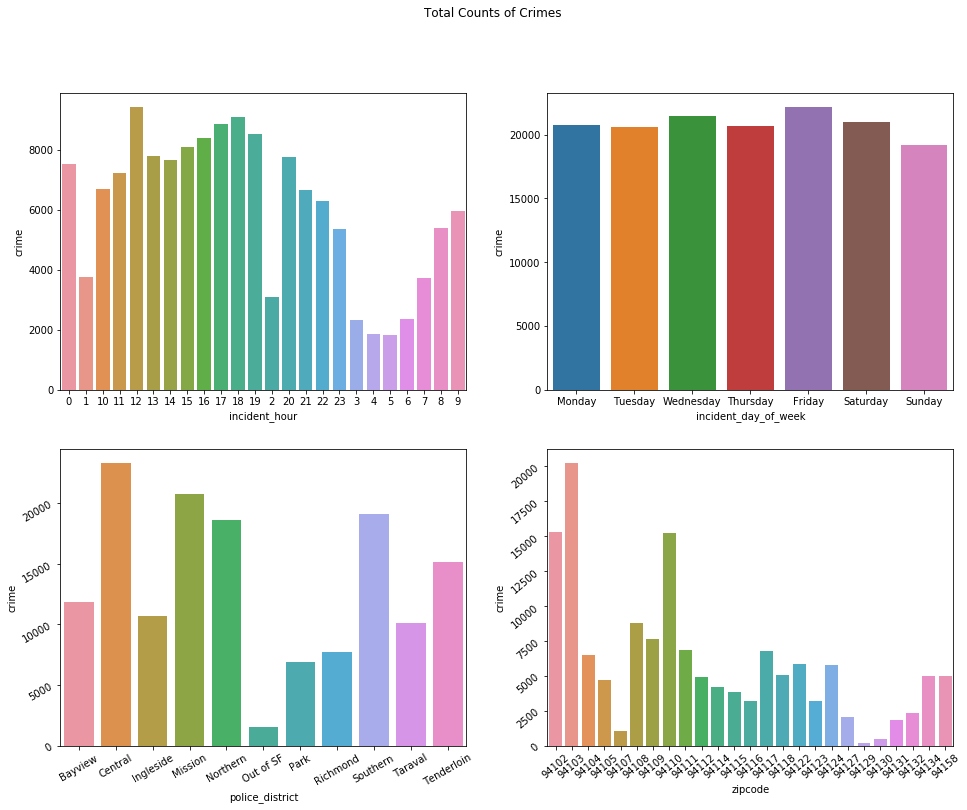

In [13]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fg,ax = plt.subplots(2,2,figsize=(16,12))

x,y = create_counts('incident_day_of_week')
sns.barplot(x,y,ax=ax[0][1],order = order)
x,y = create_counts('incident_hour')
sns.barplot(x,y,ax=ax[0][0])
x,y = create_counts('zipcode')
sns.barplot(x,y,ax=ax[1][1])
x,y = create_counts('police_district')
sns.barplot(x,y,ax=ax[1][0])
ax[1][1].tick_params(labelrotation=40)
ax[1][0].tick_params(labelrotation=30)

fg.suptitle("Total Counts of Crimes")

From the plots above, we observed large differences in the number of crimes across geographical regions as defined by zipcodes and policing districts, as shown in these barplots. The hour of day also seems to matter a lot, with number of crimes peaking from 10 AM to 7 PM. 

Text(0.5, 1.0, '2018 Total Crimes per Zipcode in San Francisco')

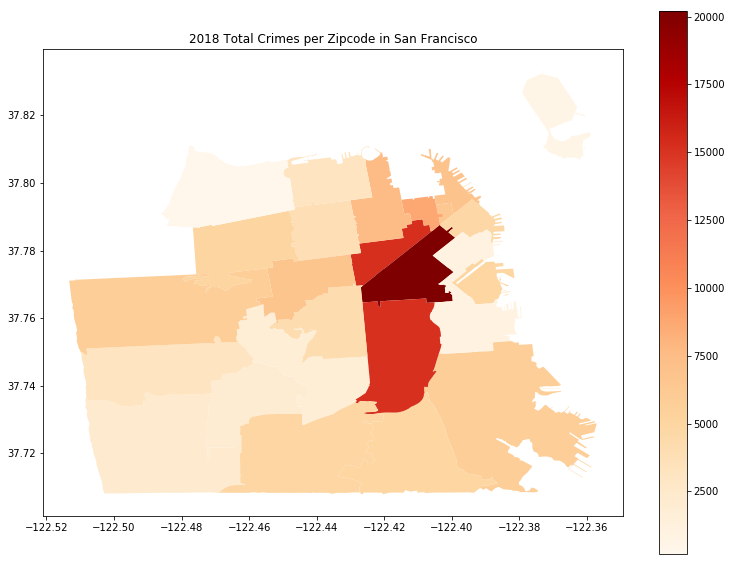

In [14]:
# Crime by zip code
import geopandas
sf = geopandas.read_file('data/zipcodes_geo.json')
sf.crs = {'init': 'epsg:4326'}
sf = sf.set_geometry('geometry')
sf['zip_code'] = sf['zip_code'].astype(np.int32)

df_zip = df.groupby('zipcode')['crime'].sum().reset_index()

chloropleth_data = pd.merge(sf, df_zip, left_on='zip_code', right_on='zipcode', how = 'right')
chloropleth_data = geopandas.GeoDataFrame(chloropleth_data, geometry='geometry')
chloropleth_data.fillna('0')
chloropleth_data.crs = {'init': 'epsg:4326'}
chloropleth_data.plot(column='crime', cmap='OrRd', figsize=(13,10), legend=True)
plt.title("2018 Total Crimes per Zipcode in San Francisco")

In [17]:
# Zipcode with high crime
df.groupby('zipcode')['crime'].sum().sort_values(ascending=False).head(3)

zipcode
94103.0    20216
94102.0    15274
94110.0    15202
Name: crime, dtype: int64

This plot offers another representation of the total number of crimes in 2018 in each zipcode. Regions with the highest number of crimes are colored in dark red. They include Union Square, the Mission District and Civic center.

Text(0.5, 1.0, 'Crime Heatmap')

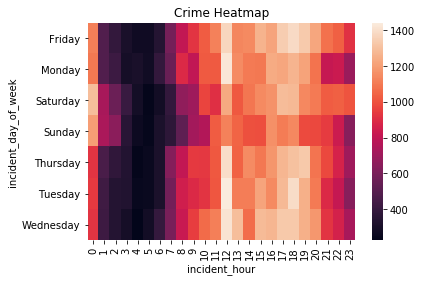

In [18]:
# Crime Heatmap showing number of crime per incident_day_of_week per incident_hour
df_group = df.groupby(['incident_day_of_week', 'incident_hour'])['crime'].sum().reset_index()
heat = pd.pivot_table(df_group, values='crime', index=['incident_day_of_week'],columns=['incident_hour'], aggfunc=np.sum)

sns.heatmap(heat)
plt.title("Crime Heatmap")

Additionally, we noticed an interesting interaction effect between day of week and the hour of incidents in predicting number of crimes. We can see that, aside from the intra-day shift in criminal activity, there is a pretty significant delay in criminal activity during the weekend. This suggest that the patterns in criminal activity changes significantly for both incident day of week and incident hour.   
These exploratory analyses informed our decisions on feature selection down the stream. 


# Section 3: Building a Predictive Policing Model

In [ ]:
# Describe what we are trying to predict, inputs and output

# Section 4: Simulation Study

In [ ]:
# Talk about the goal of simulation study: showcase the danger of misusing such models and simplying sending more police
# to areas with high crime is a bad idea

# Section 5: Conclusion and Recommendation

Mention limitations: 
- we did not differentiate between crimes that can be deterred (# crime would decrease) versus those that can be discorvered. I.e. our assumptions for the simulation might not hold.
- We did not consider adversarial response, i.e. criminal activities might shift as they adjust their behavior based on their own observations of policing activities and patrol routes.   
......